<h1><strong>COVID - 19</strong></h1>
<hr>
<br>



#**Pacotes**

In [1]:
#Pacotes
!pip install requests_html
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.6 MB/s 
     |████████████████████████████████| 140 kB 42.5 MB/s 
     |████████████████████████████████| 112 kB 44.3 MB/s 
     |████████████████████████████████| 127 kB 47.0 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=5d22a255689c8be433e58159f5ed5a3dac156dab18962c6bce3a9b0488030e75
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=ae7a529e4157d7a0a4182482a326f8fcd4d8d0ef98001787fe3180b1f262d7a9
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built fake-useragent parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urll

In [2]:
# BIBLIOTECAS
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# import mplcyberpunk


%matplotlib inline
plt.style.use("ggplot")
sns.set_style()

# pd.options.plotting.backend = "plotly"
pd.set_option('mode.chained_assignment', None)

#**Funções**

In [3]:
# Cria novas colunas no nosso Data Frame
def create_features(df,label=None):

        df['date'] = df.index
        df['hour'] = df['date'].dt.hour
        df['dayofweek'] = df['date'].dt.dayofweek
        df['quarter'] = df['date'].dt.quarter
        df['month'] = df['date'].dt.month
        df['dayofyear'] = df['date'].dt.dayofyear
        df['dayofmonth'] = df['date'].dt.day
        df['weekofyear'] = df['date'].dt.weekofyear

        X = df[['hour','dayofweek','quarter','month','dayofyear','dayofmonth','weekofyear']]
        if label:
            y = df[label]
            return X, y
        return X

In [4]:

def pie(pct,data):
    return "{:.2f}% ".format(pct)

def func_log(pct,data):
    val = (pct/100)*np.sum(np.log(data)) # Transforma a porcentagem de volta no valor

    val = round(np.exp(val)) # Tira o log

    val = (val/sum(data))*100 # Transforma em porcentagem real

    absolute = int(val/100*np.sum(data)) # Total

    return "{:.2f}% ".format(val)

def func_sqrt(pct,data):
    val = (pct/100)*np.sum(np.sqrt(data)) # Transforma a porcentagem de volta no valor

    val = round(val**2) # Tira a raiz

    val = (val/sum(data))*100

    absolute = int(val/100*np.sum(data)) # Transforma em porcentagem real

    return "{:.2f}% ".format(val)

def func_cbrt(pct,data):
    val = (pct/100)*np.sum(np.cbrt(data)) # Transforma a porcentagem de volta no valor

    val = round(val**3) # Tira a raiz

    val = (val/sum(data))*100

    absolute = int(val/100*np.sum(data)) # Transforma em porcentagem real
    a ="{:.2f}% ".format(val)

    return a

#**1. Extração da base de dados**

---




**<h1>Dicionário de dados</h1>**


---
*SRAG 2020 - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19*
[https://opendatasus.saude.gov.br/ro/dataset/bd-srag-2020](https://opendatasus.saude.gov.br/ro/dataset/bd-srag-2020)
<p>
DT_NOTIFIC: Data do preenchimento da ficha de
notificação.
</p>
<p>
DT_INTERNA: Data da internação por SRAG.
</p>
<p>
NU_IDADE_N: Idade.
</p>
<p>
CS_SEXO: Sexo. 

1.   Masculino
2.   Feminino
3.   Indefinido

</p>
<p>
SG_UF: UF
</p>
<p>
DT_SIN_PRI: Data de 1ºs sintomas.
</p>
<p>
CS_GESTANT: Gestante.

0.   Ignorado ou 9
1.   1º Trimestre
2.   2º Trimestre
3.   3º Trimestre
4.   Idade Gestacional indígena
5.   Não
6.   Não se aplica

</p>
<p>
CS_RACA: Raça/Cor

0.   Ignorado ou 9
1.   Branca
2.   Preta
3.   Amarela
4.   Parda
5.   Indígena

</p>
<p>
CS_ESCOL_N: Escolaridade.

0.   Sem escolaridade/Analfabeto
1.   Fundamental 1º ciclo (1ª a 5ª série)
2.   Fundamental 2º ciclo (6ª a 9ª série)
3.   Médio (1º ao 3º ano)
4.   Superior
5.   Ignorado

</p>
<p>
HISTO_VGM: Paciente tem histórico de viagem internacional até 14 dias antes do início dos sintomas?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
NOSOCOMIAL: Trata-se de caso nosocomial (infecção adquirida no hospital)?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
FEBRE: Sinais e Sintomas/Febre.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
TOSSE: Sinais e Sintomas/Tosse.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
GARGANTA: Sinais e Sintomas/Dor de Garganta.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DISPNEIA: Sinais e Sintomas/Dispneia.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DESC_RESP: Sinais e Sintomas/Desconforto Respiratório

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
SATURACAO: Sinais e Sintomas/Saturação O2 < 95%.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DIARREIA: 5-Sinais e Sintomas/Diarreia.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
VOMITO: Sinais e Sintomas/Vômito.

</p>
<p>
DOR_ABD: Sinais e Sintomas/Dor abdominal.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
FADIGA: Sinais e Sintomas/Fadiga.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
PERD_OLFT: Sinais e Sintomas/Perda do Olfato.
</p>
<p>
PERD_PALA: Sinais e Sintomas/Perda do Paladar.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
OUTRO_SIN: Sinais e Sintomas/Outros.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
FATOR_RISC: Fatores de risco.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
PUERPERA: Fatores de risco/ Puérpera.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
CARDIOPATI: Fatores de risco/ Doença Cardiovascular Crônica.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
HEMATOLOGI: Fatores de risco/ Doença Hematológica Crônica.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
SIND_DOWN: Fatores de risco/ Síndrome de Down

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
HEPATICA: Fatores de risco/ Doença Hepática Crônica.


1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
ASMA: Fatores de risco/ Asma.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DIABETES: Fatores de risco/ Diabetes mellitu.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
NEUROLOGIC: Fatores de risco/ Doença Neurológica Crônica.


1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
PNEUMOPATI: Fatores de risco/ Outra Pneumatopatia Crônica.


1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
IMUNODEPRE: Fatores de risco/ Imunodeficiência ou Imunodepressão.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
RENAL: Fatores de risco/ Doença Renal Crônica.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
OBESIDADE: Fatores de risco/ Obesidade.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
OBES_IMC: Fatores de risco/ Obesidade (Descrição IMC).

</p>
<p>
OUT_MORBI: Fatores de risco/ Outros.

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
VACINA: Recebeu vacina contra Gripe na última campanha?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
MAE_VAC: Se < 6 meses: a mãe recebeu a vacina?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
ANTIVIRAL: Usou antiviral para gripe?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
UTI: Internado em UTI?

1.   Sim
2.   Não
9.   Ignorado - 9

</p>
<p>
DT_ENTUTI: Data da entrada na UTI.

</p>
<p>
DT_SAIDUTI: Data da saída da UTI.

</p>
<p>
SUPORT_VEN: Uso de suporte ventilatório? 

1.   Sim, invasivo
2.   Sim, não invasivo
3.   Não
4.   Ignorado - 9

</p>
<p>
CLASSI_FIN: Classificação final do caso.

1.   SRAG por influenza
2.   SRAG por outro vírus respiratório
3.   SRAG por outro agente etiológico, qual:
4.   SRAG não especificado
5.   SRAG por COVID-19

</p>
<p>
EVOLUCAO: Evolução do caso.

1.   Cura
2.   Óbito
3.   Óbito por outras causas
4.   Ignorado - 9

</p>
<p>
DT_EVOLUCA: Data da alta ou óbito.

</p>


In [5]:
# BASE DE DADOS

from requests_html import HTMLSession
from requests_html import AsyncHTMLSession

session = HTMLSession() # Inicializa sessão GET
url = 'https://opendatasus.saude.gov.br/dataset/srag-2021-e-2022'
r = session.get(url) 

descriptions_wheather_of_forecast =  r.html.find('.resource-url-analytics') # Realiza a raspagem de de dados do elemento html 

link2020 = descriptions_wheather_of_forecast[2].attrs['href'] # Atributo contendo o link contendo a base de dados que desejamos
link2021 = descriptions_wheather_of_forecast[3].attrs['href'] # Atributo contendo o link contendo a base de dados que desejamos

usecols=['DT_NOTIFIC','DT_INTERNA','UTI','DT_ENTUTI','DT_SAIDUTI','NU_IDADE_N','CS_SEXO','SG_UF_NOT','DT_SIN_PRI','CS_GESTANT',
         'CS_RACA','CS_ESCOL_N','OUT_MORBI','VACINA','MAE_VAC','ANTIVIRAL','SUPORT_VEN','CLASSI_FIN','EVOLUCAO',
         'HISTO_VGM','NOSOCOMIAL','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA',
         'VOMITO','DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA','OUTRO_SIN','FATOR_RISC','PUERPERA','CARDIOPATI','HEMATOLOGI',
         'SIND_DOWN','HEPATICA','ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE',]

# Leitura dos dados
data_set_sars = pd.read_csv(link2021,sep=';',error_bad_lines=False,parse_dates=['DT_ENTUTI','DT_SAIDUTI','DT_NOTIFIC','DT_INTERNA'],usecols=usecols)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# DADOS COVID
data_set_cov = data_set_sars[data_set_sars['CLASSI_FIN']==5]
data_set_cov.head()
# Tratamento
data_set_cov[data_set_cov == 9] = np.nan
data_set_cov.loc[data_set_cov['CS_ESCOL_N']==5,'CS_ESCOL_N'] = np.nan

data_set_cov.loc[:,'FATOR_RISC'] = data_set_cov['FATOR_RISC'].replace('S',1)
data_set_cov.loc[:,'FATOR_RISC'] = data_set_cov['FATOR_RISC'].replace('N',0)

print('Quantidade de colunas:',len(data_set_cov.columns))
print('Quantidade de linha:',len(data_set_cov))

Quantidade de colunas: 47
Quantidade de linha: 184781


#**2. Entendimento dos dados**

---







In [7]:
data_set_sars.head()

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,FEBRE,...,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,2022-06-01,06/01/2022,SP,F,69,6,1,2.0,2.0,2.0,...,NaN,NaT,2.0,4.0,1.0,0,2.0,2.0,2.0,2.0
1,2022-04-01,02/01/2022,MG,M,87,6,4,1.0,2.0,1.0,...,NaN,NaT,2.0,4.0,1.0,0,2.0,1.0,2.0,2.0
2,2022-05-01,03/01/2022,RS,F,60,5,1,9.0,2.0,NaN,...,05/01/2022,2022-01-26,2.0,4.0,1.0,0,NaN,NaN,NaN,NaN
3,2022-06-01,02/01/2022,SP,M,3,6,9,NaN,NaN,1.0,...,03/01/2022,NaT,NaN,5.0,NaN,0,NaN,NaN,NaN,NaN
4,2022-05-01,02/01/2022,SP,M,61,6,9,NaN,2.0,2.0,...,04/01/2022,NaT,2.0,1.0,2.0,0,2.0,2.0,2.0,2.0


In [8]:
data_set_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184781 entries, 3 to 416951
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DT_NOTIFIC  184781 non-null  datetime64[ns]
 1   DT_SIN_PRI  184781 non-null  object        
 2   SG_UF_NOT   184781 non-null  object        
 3   CS_SEXO     184781 non-null  object        
 4   NU_IDADE_N  184083 non-null  float64       
 5   CS_GESTANT  177979 non-null  float64       
 6   CS_RACA     153687 non-null  float64       
 7   CS_ESCOL_N  57820 non-null   float64       
 8   NOSOCOMIAL  150977 non-null  float64       
 9   FEBRE       142628 non-null  float64       
 10  TOSSE       153142 non-null  float64       
 11  GARGANTA    122039 non-null  float64       
 12  DISPNEIA    147566 non-null  float64       
 13  DESC_RESP   136531 non-null  float64       
 14  SATURACAO   142407 non-null  float64       
 15  DIARREIA    117469 non-null  float64       
 16  VO

In [9]:
# Nulos
display(data_set_cov.isna().sum().to_frame('Total de nulos').sort_values(['Total de nulos']))

,Total de nulos
DT_NOTIFIC,0
CLASSI_FIN,0
HISTO_VGM,0
FATOR_RISC,0
SG_UF_NOT,0
DT_SIN_PRI,0
CS_SEXO,0
NU_IDADE_N,698
CS_GESTANT,6802
DT_INTERNA,11373


In [10]:
data_set_cov.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_IDADE_N,184083.0,62.882347,24.897766,-9.0,50.0,70.0,82.0,118.0
CS_GESTANT,177979.0,5.599116,0.624036,0.0,5.0,6.0,6.0,6.0
CS_RACA,153687.0,2.199340,1.434095,1.0,1.0,1.0,4.0,5.0
CS_ESCOL_N,57820.0,1.824611,1.238422,0.0,1.0,2.0,3.0,4.0
NOSOCOMIAL,150977.0,1.949416,0.219147,1.0,2.0,2.0,2.0,2.0
FEBRE,142628.0,1.413916,0.492536,1.0,1.0,1.0,2.0,2.0
TOSSE,153142.0,1.246229,0.430815,1.0,1.0,1.0,1.0,2.0
GARGANTA,122039.0,1.752120,0.431783,1.0,2.0,2.0,2.0,2.0
DISPNEIA,147566.0,1.294065,0.455623,1.0,1.0,1.0,2.0,2.0
DESC_RESP,136531.0,1.397529,0.489389,1.0,1.0,1.0,2.0,2.0


#**3. Analise Exploratória**


---




**Hipoteses**
*   Distribuição de mortes entre sexo masculino e feminino decorrente de COVID-19
*   Distribuição de faixas etárias de infectados decorrente de COVID-19
*   Nivel de escolaridade entre os mortos decorrente de COVID-19
*   Distribuição de raças entre as mortes decorrente de COVID-19
*   Tempo de UTI
*   Vacinação 
*   Anti virais
*   Principais sintomas
*   Principais comorbidades


In [11]:
sintomas = ['NOSOCOMIAL','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','OUTRO_SIN','PUERPERA',
            'DOR_ABD','FADIGA','PERD_OLFT','PERD_PALA']
            
comorbidades = ['FATOR_RISC','CARDIOPATI','HEMATOLOGI','SIND_DOWN','HEPATICA','ASMA','DIABETES','NEUROLOGIC',
                'PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE','OUT_MORBI']

In [12]:
df_rec_cov = data_set_cov[data_set_cov['EVOLUCAO'] == 1]
df_rec_cov.head()

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,FEBRE,...,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
22,2022-12-01,10/01/2022,MT,F,74.0,5.0,4.0,1.0,2.0,1.0,...,NaN,NaT,3.0,5.0,1.0,0,1.0,2.0,1.0,1.0
23,2022-04-01,03/01/2022,SP,M,82.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaT,3.0,5.0,1.0,0,NaN,NaN,NaN,NaN
25,2022-11-01,07/01/2022,BA,M,69.0,6.0,4.0,NaN,2.0,1.0,...,11/01/2022,NaT,2.0,5.0,1.0,0,NaN,1.0,NaN,NaN
27,2022-11-01,07/01/2022,PA,M,97.0,6.0,4.0,1.0,2.0,1.0,...,NaN,NaT,NaN,5.0,1.0,0,2.0,1.0,NaN,NaN
29,2022-01-13,12/01/2022,SP,M,10.0,6.0,4.0,NaN,NaN,1.0,...,NaN,NaT,3.0,5.0,1.0,0,2.0,2.0,2.0,2.0


In [13]:
df_mortes_cov = data_set_cov[data_set_cov['EVOLUCAO'] == 2]
df_mortes_cov.head()

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,FEBRE,...,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
10,2022-08-01,03/01/2022,RS,M,55.0,6.0,1.0,NaN,2.0,1.0,...,NaN,NaT,2.0,5.0,2.0,0,2.0,1.0,2.0,2.0
15,2022-06-01,05/01/2022,SP,F,83.0,5.0,NaN,NaN,2.0,2.0,...,NaN,NaT,NaN,5.0,2.0,0,2.0,2.0,2.0,2.0
30,2022-12-01,09/01/2022,SE,F,81.0,6.0,4.0,NaN,NaN,1.0,...,NaN,NaT,2.0,5.0,2.0,0,NaN,NaN,NaN,NaN
48,2022-07-01,06/01/2022,SP,F,79.0,NaN,1.0,NaN,NaN,2.0,...,NaN,NaT,2.0,5.0,2.0,0,2.0,2.0,2.0,2.0
87,2022-01-20,10/01/2022,TO,F,72.0,5.0,4.0,3.0,2.0,1.0,...,12/01/2022,2022-01-14,1.0,5.0,2.0,0,1.0,1.0,1.0,1.0


In [14]:
data_set_cov.query('EVOLUCAO == 1')

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,FEBRE,...,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,CLASSI_FIN,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
22,2022-12-01,10/01/2022,MT,F,74.0,5.0,4.0,1.0,2.0,1.0,...,NaN,NaT,3.0,5.0,1.0,0,1.0,2.0,1.0,1.0
23,2022-04-01,03/01/2022,SP,M,82.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaT,3.0,5.0,1.0,0,NaN,NaN,NaN,NaN
25,2022-11-01,07/01/2022,BA,M,69.0,6.0,4.0,NaN,2.0,1.0,...,11/01/2022,NaT,2.0,5.0,1.0,0,NaN,1.0,NaN,NaN
27,2022-11-01,07/01/2022,PA,M,97.0,6.0,4.0,1.0,2.0,1.0,...,NaN,NaT,NaN,5.0,1.0,0,2.0,1.0,NaN,NaN
29,2022-01-13,12/01/2022,SP,M,10.0,6.0,4.0,NaN,NaN,1.0,...,NaN,NaT,3.0,5.0,1.0,0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416925,2022-07-30,30/07/2022,MG,M,2.0,6.0,1.0,0.0,2.0,2.0,...,NaN,NaT,3.0,5.0,1.0,0,2.0,2.0,2.0,2.0
416930,2022-07-22,03/02/2022,RS,F,56.0,5.0,NaN,1.0,2.0,2.0,...,NaN,NaT,2.0,5.0,1.0,0,2.0,2.0,2.0,2.0
416942,2022-10-07,30/06/2022,SP,F,72.0,5.0,1.0,4.0,2.0,2.0,...,09/07/2022,NaT,3.0,5.0,1.0,0,2.0,2.0,2.0,2.0
416944,2022-08-17,28/06/2022,SP,F,78.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaT,NaN,5.0,1.0,0,NaN,1.0,NaN,NaN


In [15]:
# METRICAS RECUPERADOS
df_raca = df_rec_cov.dropna(subset=['CS_RACA'],axis=0)
df_escol = df_rec_cov.dropna(subset=['CS_ESCOL_N'],axis=0)
df_dt_uti = df_rec_cov.dropna(subset=['DT_ENTUTI','DT_SAIDUTI'],axis=0)
df_vacina = df_rec_cov.dropna(subset=['VACINA'],axis=0)
df_vacina = df_rec_cov.dropna(subset=['ANTIVIRAL'],axis=0)
df_sintomas = df_rec_cov[sintomas]
df_comorbidades = df_rec_cov[comorbidades]

# METRICAS MORTOS
df_raca_m = df_mortes_cov.dropna(subset=['CS_RACA'],axis=0)
df_escol_m = df_mortes_cov.dropna(subset=['CS_ESCOL_N'],axis=0)
df_dt_uti_m = df_mortes_cov.dropna(subset=['DT_ENTUTI','DT_SAIDUTI'],axis=0)
df_vacina_m = df_mortes_cov.dropna(subset=['VACINA'],axis=0)
df_vacina_m = df_mortes_cov.dropna(subset=['ANTIVIRAL'],axis=0)
df_sintomas_m = df_mortes_cov[sintomas]
df_comorbidades_m = df_mortes_cov[comorbidades]


##**Infecatados**

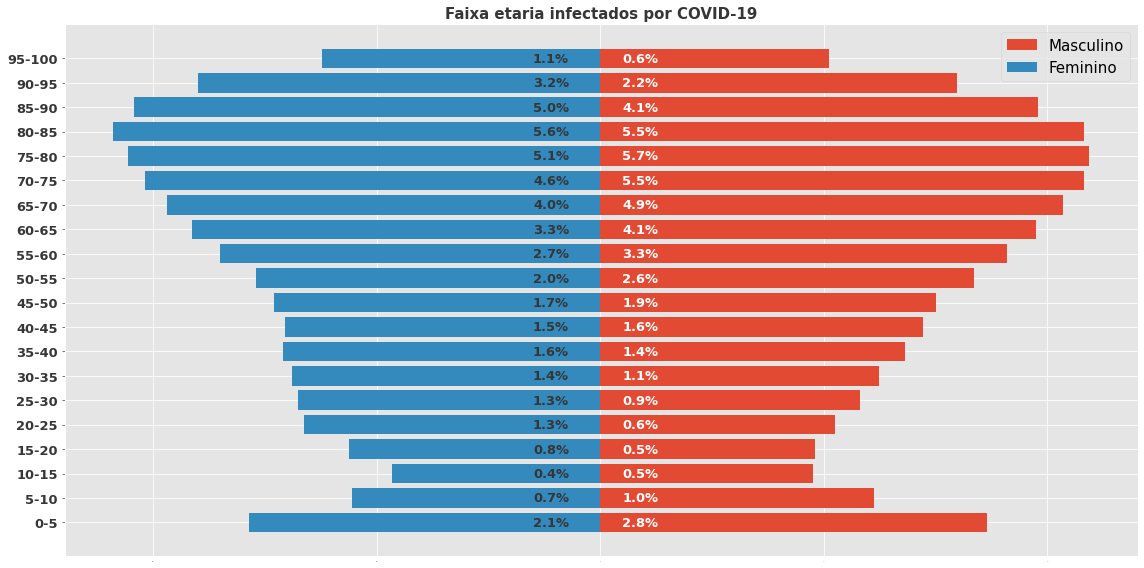

In [16]:
# Dados
data = data_set_cov[['NU_IDADE_N','CS_SEXO']]

dataM = data[data['CS_SEXO']=='M']['NU_IDADE_N']
dataF = data[data['CS_SEXO']=='F']['NU_IDADE_N']

label_list = [str(i)+'-'+str(j) for i,j in zip(range(0,105,5),range(5,105,5))]
bins=[x for x in range(0,105,5)]

m_idadeet=pd.cut(dataM,bins=bins, labels=label_list).value_counts()
f_idadeet=pd.cut(dataF,bins=bins, labels=label_list).value_counts()

m_idadeet = m_idadeet.sort_index()
f_idadeet = f_idadeet.sort_index()

# display((m_idadeet+f_idadeet).to_frame())

Xm = np.cbrt(m_idadeet.values)
Ym = np.arange(len(m_idadeet))

xm_labels = (m_idadeet.values/(sum(m_idadeet.values)+sum(f_idadeet.values)))*100

Xf = - np.cbrt(f_idadeet.values)
Yf = np.arange(len(f_idadeet))
xf_labels = (f_idadeet.values/(sum(m_idadeet.values)+sum(f_idadeet.values)))*100

label = m_idadeet.keys()

# Grafico
plt.subplots(figsize=(16,8))
plt.barh(Ym,Xm,label='Masculino')
plt.barh(Yf,Xf,label='Feminino')

for x,y,s in zip(Xm,Ym,xm_labels):
  plt.text(1,y-0.15,str(round(s,1))+'%',fontsize=13,fontweight='bold',color='w')

for x,y,s in zip(Xf,Yf,xf_labels):
  plt.text(-3,y-0.15,str(round(s,1))+'%',fontsize=13,fontweight='bold',color='#363636')

plt.yticks(Ym,label,fontsize=13,fontweight='bold',color='#363636')
plt.title('Faixa etaria infectados por COVID-19',fontsize=15,fontweight='bold',color='#363636')
plt.tick_params(axis='x', labelsize=0, length = 0)
plt.legend(fontsize=15)

plt.tight_layout()


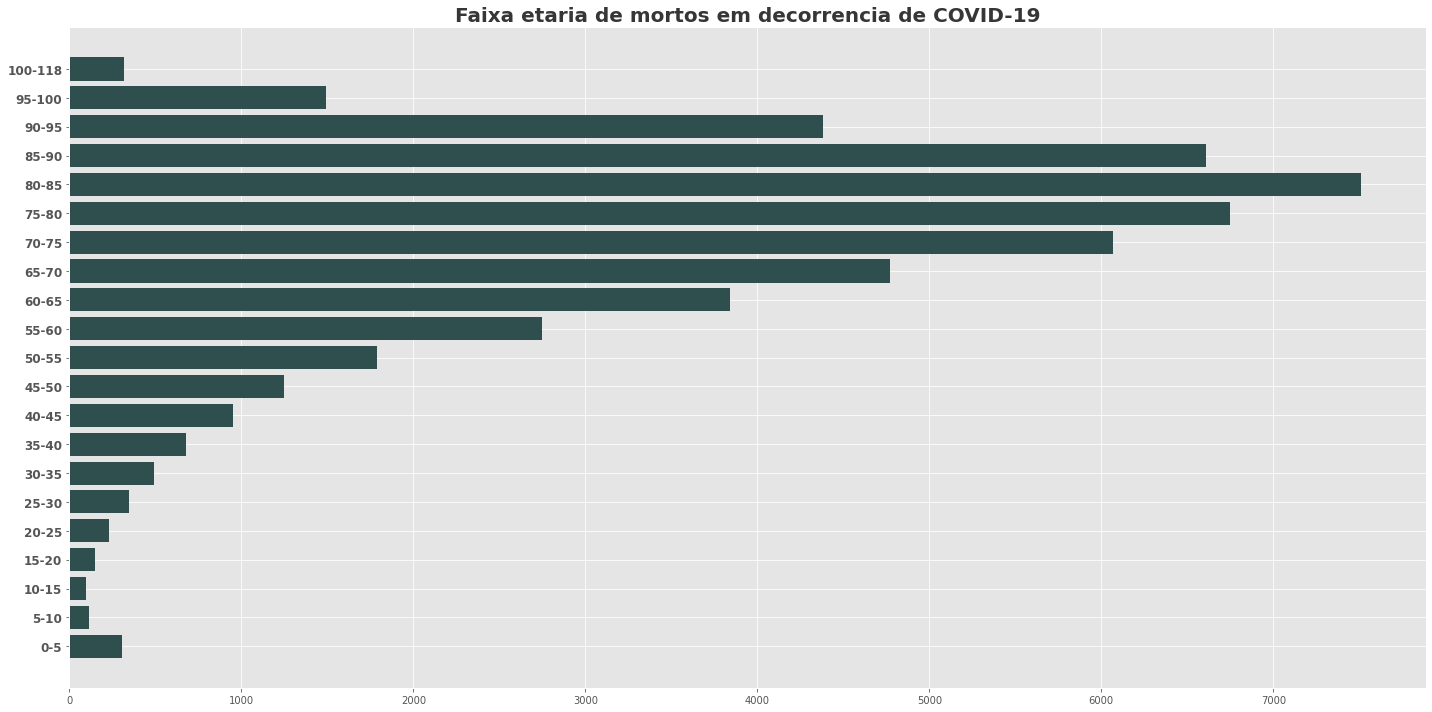

In [17]:
data = df_mortes_cov
bins = [x for x in range(0,105,5)]+[data.NU_IDADE_N.max()]
label = [str(a)+'-'+str(b) for a,b in zip(range(0,105,5),range(5,105,5))]+['100-'+str(round(data.NU_IDADE_N.max()))]

data_eta = pd.cut(data.NU_IDADE_N,bins=bins,labels=label).value_counts()
data_eta = data_eta.sort_index()
X = data_eta.keys()
Y = data_eta.values

plt.subplots(figsize=(20,10))
plt.barh(X,Y,color="#2F4F4F")
plt.title('Faixa etaria de mortos em decorrencia de COVID-19',fontweight='bold',fontsize=20,color='#363636')
plt.yticks(fontweight='bold',fontsize=12)
plt.tight_layout()

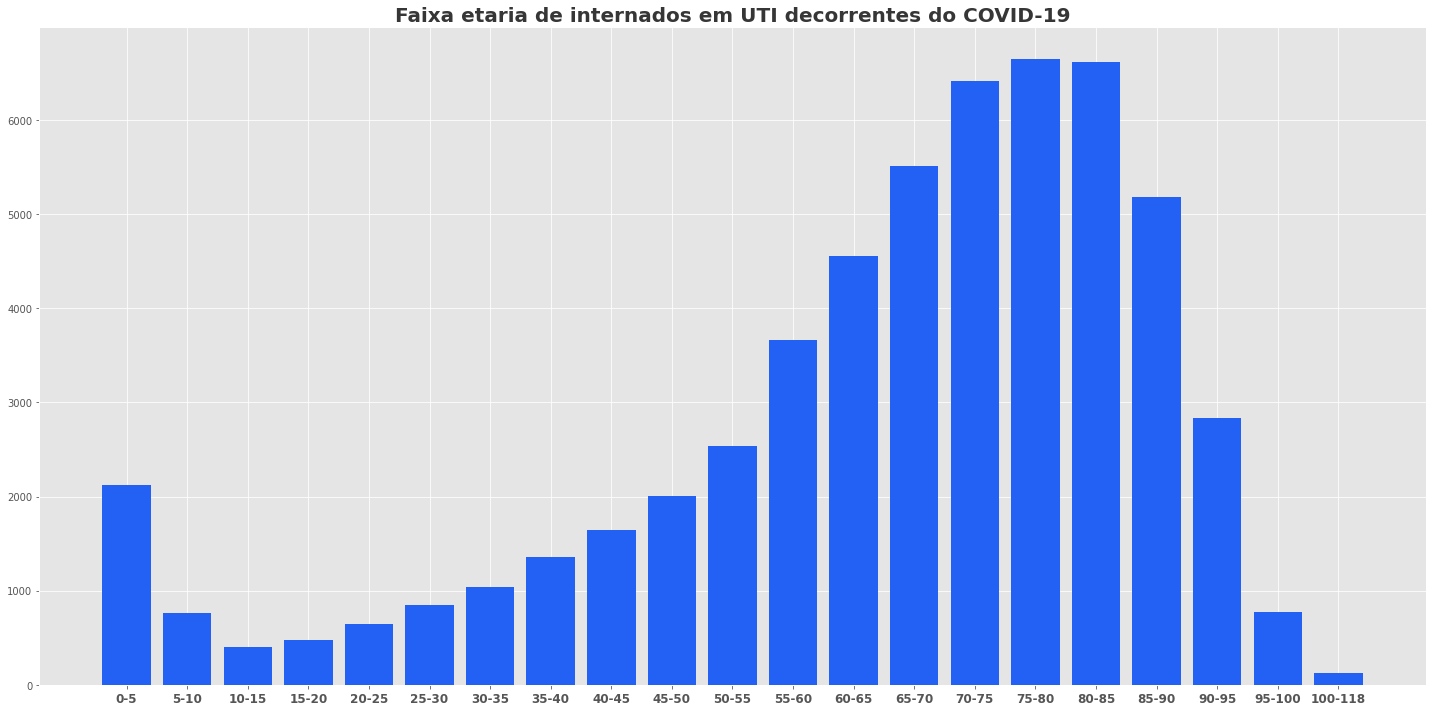

In [18]:
data = data_set_cov[['NU_IDADE_N','UTI']].dropna()
data = data[data.UTI == 1]
bins = [x for x in range(0,105,5)]+[data.NU_IDADE_N.max()]
label = [str(a)+'-'+str(b) for a,b in zip(range(0,105,5),range(5,105,5))]+['100-'+str(round(data.NU_IDADE_N.max()))]

data_eta = pd.cut(data.NU_IDADE_N,bins=bins,labels=label).value_counts()
data_eta = data_eta.sort_index()
X = data_eta.keys()
Y = data_eta.values

plt.subplots(figsize=(20,10))
plt.bar(X,Y,color="#2261F3")
plt.title('Faixa etaria de internados em UTI decorrentes do COVID-19',fontweight='bold',fontsize=20,color='#363636')
plt.xticks(fontweight='bold',fontsize=12)
plt.tight_layout()

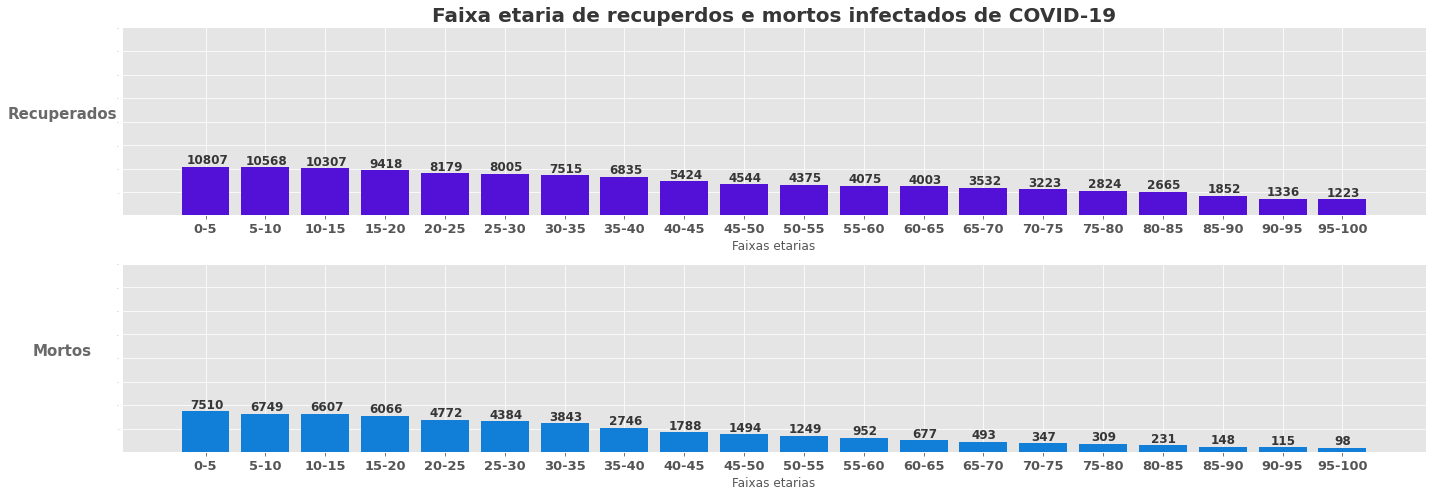

In [19]:
data_r = df_rec_cov['NU_IDADE_N']
LX_r = [str(i)+'-'+str(j) for i,j in zip(range(0,105,5),range(5,105,5))]

data_r = pd.cut(data_r,bins=[x for x in range(0,105,5)],labels=LX_r)
data_r = data_r.value_counts()
X_r = np.arange(len(data_r))
Y_r = np.sqrt(data_r.values)

LY_r = data_r.values

data_m = df_mortes_cov['NU_IDADE_N']
LX_m = [str(i)+'-'+str(j) for i,j in zip(range(0,105,5),range(5,105,5))]

data_m = pd.cut(data_m,bins=[x for x in range(0,105,5)],labels=LX_m)
data_m = data_m.value_counts()
X_m = np.arange(len(data_m))
Y_m = np.sqrt(data_m.values)

LY_m = data_m.values


plt.subplots(figsize=(20,7))

plt.subplot(2,1,1)

plt.bar(X_r,Y_r,color='#5311D8')
for x,y,s in zip(X_r,Y_r,LY_r):
  plt.text(x-len(str(s))/15.5,y+7,s,fontsize=12,fontweight='bold',color='#363636')

plt.xlabel('Faixas etarias')
plt.ylabel('Numero de pessoas')
plt.title('Faixa etaria de recuperdos e mortos infectados de COVID-19',fontsize=20,fontweight='bold',color='#363636')
plt.xticks(X_r,LX_r,fontsize=13,fontweight='bold')
plt.tick_params(axis='y', labelsize=0, length = 0)
plt.ylabel('Recuperados', fontsize=15,labelpad=55,fontweight='bold',color='#696969',rotation=0)
plt.ylim([1,400])

plt.subplot(2,1,2)

plt.bar(X_m,Y_m,color='#117ED8')

for x,y,s in zip(X_m,Y_m,LY_m):
  plt.text(x-len(str(s))/15.5,y+7,s,fontsize=12,fontweight='bold',color='#363636')

plt.xlabel('Faixas etarias')
plt.ylabel('Numero de pessoas')
plt.xticks(X_m,LX_m,fontsize=13,fontweight='bold')
plt.tick_params(axis='y', labelsize=0, length = 0)
plt.ylabel('Mortos', fontsize=15,labelpad=55,fontweight='bold',color='#696969',rotation=0)
plt.ylim([1,400])



plt.tight_layout()

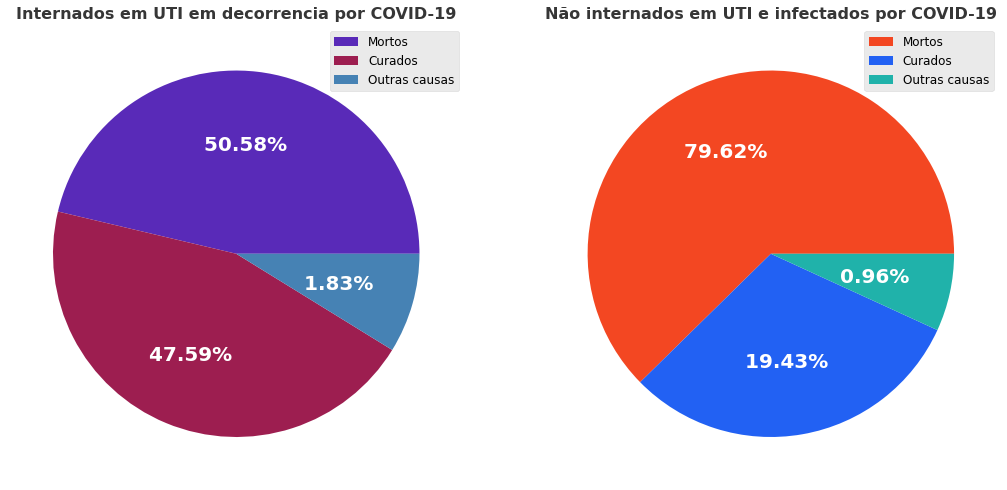

In [20]:
data = data_set_cov[['EVOLUCAO','UTI']]
data.EVOLUCAO = data.EVOLUCAO.replace(1,'Curado')
data.EVOLUCAO = data.EVOLUCAO.replace(2,'Morto')
data.EVOLUCAO = data.EVOLUCAO.replace(3,'Outras causas')

internados = data[data.UTI == 1].EVOLUCAO.value_counts()
nao_internados = data[data.UTI == 2].EVOLUCAO.value_counts()

plt.subplots(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.pie(np.sqrt(internados),autopct=(lambda pct:func_sqrt(pct,internados)),textprops={'fontsize':20,'fontweight':'bold','color':'w'},colors=['#592AB8','#9D1E50','#4682B4'])
plt.title('Internados em UTI em decorrencia por COVID-19',fontsize=16,fontweight='bold',color='#363636')
plt.legend(['Mortos','Curados','Outras causas'],fontsize=12)

plt.subplot(1, 2, 2)
plt.pie(np.sqrt(nao_internados),autopct=(lambda pct:func_sqrt(pct,nao_internados)),textprops={'fontsize':20,'fontweight':'bold','color':'w'},colors=['#F34722','#2261F3','#20B2AA'])
plt.title('Não internados em UTI e infectados por COVID-19',fontsize=16,fontweight='bold',color='#363636')
plt.legend(['Mortos','Curados','Outras causas'],fontsize=12)

plt.tight_layout()

,Total sintomas
PUERPERA,81616.0
TOSSE,115668.0
OUTRO_SIN,116179.0
SATURACAO,118529.0
DISPNEIA,118588.0
DESC_RESP,119274.0
FEBRE,122830.0
FADIGA,127302.0
GARGANTA,130642.0
DOR_ABD,134651.0


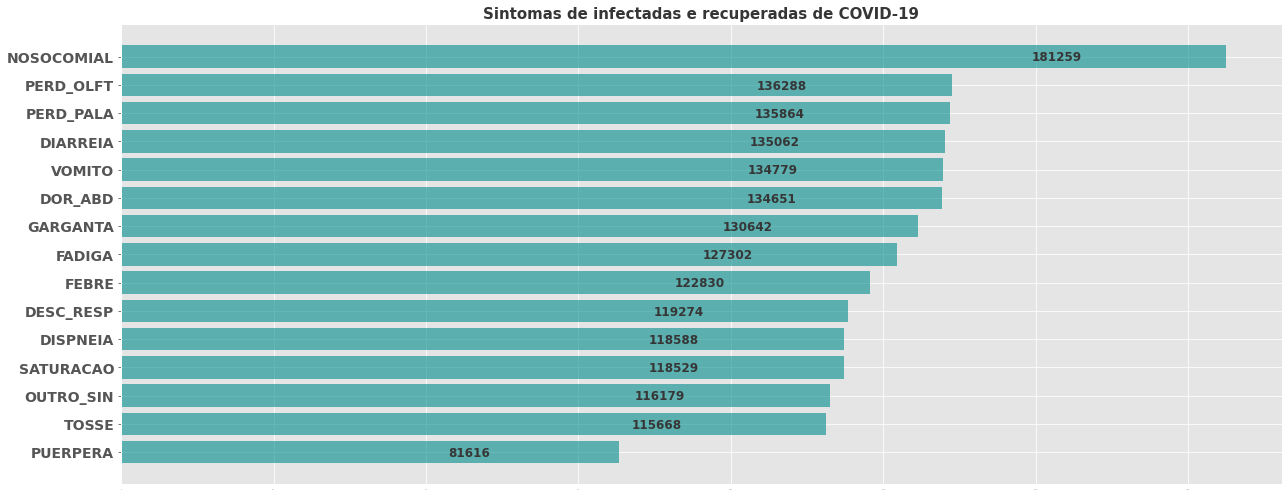

In [21]:
data = df_sintomas.sum().sort_values()

display(data.to_frame('Total sintomas'))
X = data.values
Y = np.arange(len(data))

x_labels = data.values
y_labels = data.keys()

plt.subplots(figsize=(18,7))
plt.barh(Y,X,color='darkcyan',alpha=0.6)

for x,y,s in zip(X,Y,x_labels):
  plt.text(x-(4000*len(str(s))),y-0.14,round(s),fontsize=12,fontweight='bold',color='#363636')
plt.title('Sintomas de infectadas e recuperadas de COVID-19',fontsize=15,fontweight='bold',color='#363636')
plt.yticks(Y,y_labels,fontsize=14,fontweight='bold')
plt.tick_params(axis='x',labelsize = 0, length = 0)

plt.tight_layout()

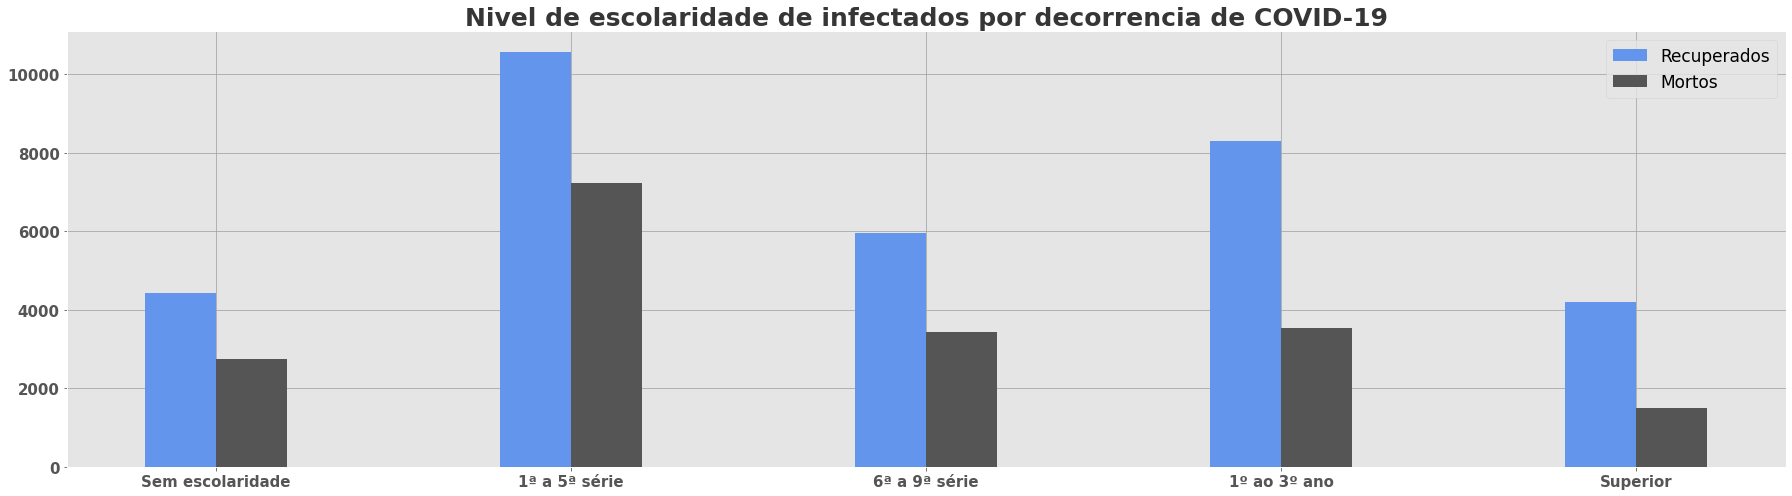

In [22]:
data = data_set_cov.groupby(['EVOLUCAO','CS_ESCOL_N'])['CS_ESCOL_N'].count()
data = data.sort_index()
label_x = ['Sem escolaridade','1ª a 5ª série','6ª a 9ª série','1º ao 3º ano','Superior']


plt.subplots(figsize=(25,7))
plt.bar(data[1].keys()-0.1, data[[1]].values, width=0.2, color='#6495ED', align='center',label='Recuperados')
plt.bar(data[1].keys()+0.1, data[[2]].values, width=0.2, color='#555555', align='center',label='Mortos')
plt.xticks(data[1].keys(),label_x,fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.grid(b=True, which='both', color='0.65', linestyle='-')
plt.legend(fontsize=17)
plt.title('Nivel de escolaridade de infectados por decorrencia de COVID-19',fontweight='bold',fontsize=25,color='#363636')

plt.tight_layout()

,CS_SEXO
M,27325
F,23610
I,4


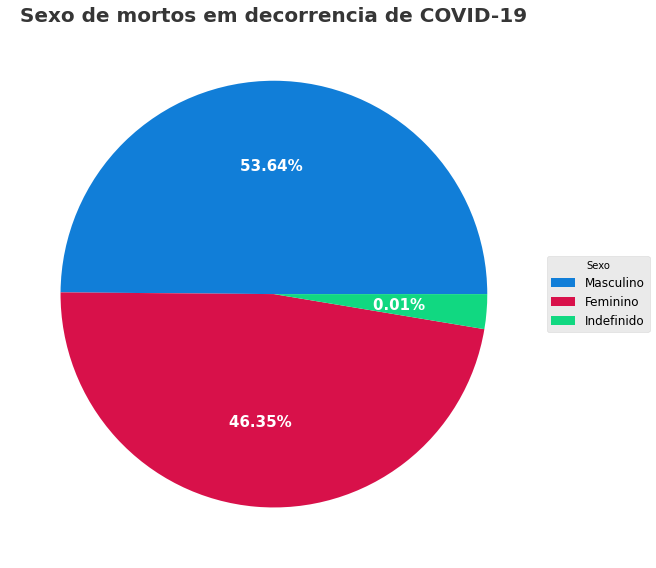

In [23]:
# Dados
data = df_mortes_cov.CS_SEXO.value_counts()

# Tabela
display(data.to_frame())

# Grafico
fig, ax = plt.subplots(figsize=(20,8))
plt.pie(np.cbrt(data),autopct=lambda pct:func_cbrt(pct,data),textprops={'fontweight':'bold','fontsize':15,'color':'w'},colors=['#117ED8','#D8114A','#11D881'])
plt.legend(['Masculino','Feminino','Indefinido'],title='Sexo',loc='center left',fontsize=12,bbox_to_anchor=[1,0,0.5,1])
plt.title('Sexo de mortos em decorrencia de COVID-19',fontsize=20,fontweight='bold',color='#363636')
fig.set_facecolor('white')
plt.tight_layout()

,Total
OUT_MORBI,41176.0
CARDIOPATI,41915.0
DIABETES,43846.0
OBESIDADE,44592.0
NEUROLOGIC,44849.0
RENAL,45037.0
IMUNODEPRE,45171.0
PNEUMOPATI,45228.0
ASMA,45688.0
HEPATICA,45841.0


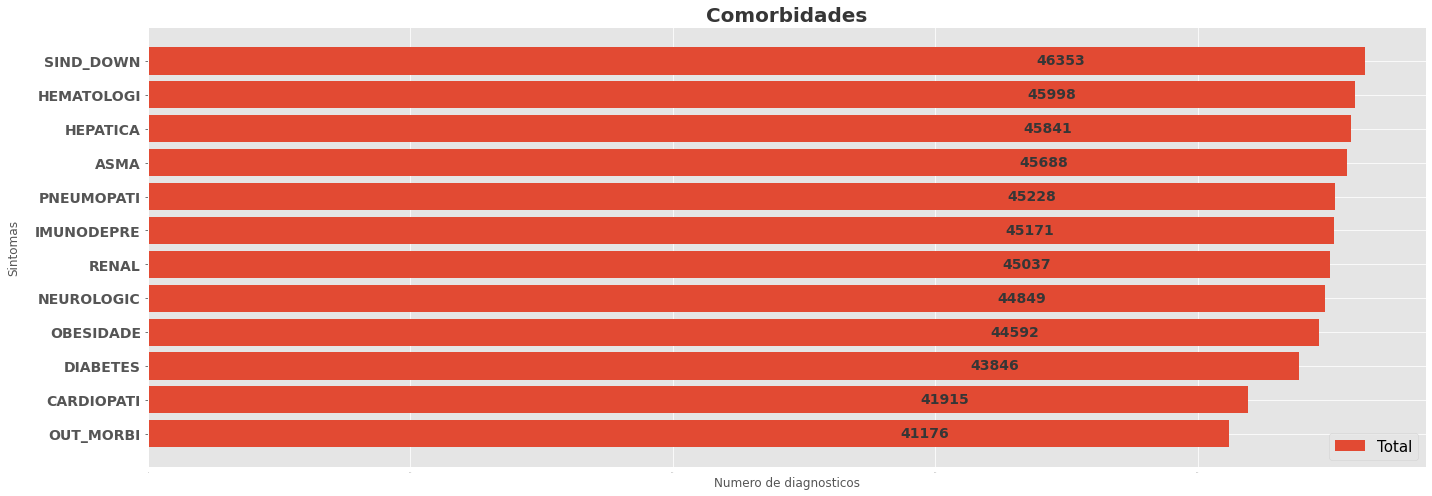

In [24]:
# Dados
data = round(df_comorbidades_m[df_comorbidades_m.FATOR_RISC == 1].iloc[:,1:].sum()).sort_values()

X = data.values
Y = np.arange(len(X))

x_labels = data.values
y_labels = data.keys()

# Tabela
display(data.to_frame('Total'))

# Grafico
plt.subplots(figsize=(20,7))
plt.barh(Y,X,label = "Total")

for x, y,s in zip(X,Y,x_labels):
    plt.text(x-len(str(round(s)))*2500,y-0.11,round(s),fontsize=14,fontweight='bold',color='#363636')

plt.yticks(Y,y_labels,fontweight='bold',fontsize=14)
plt.title('Comorbidades',fontsize=20,fontweight='bold',color='#363636')
plt.ylabel('Sintomas',labelpad=15)
plt.xlabel('Numero de diagnosticos')
plt.tick_params(axis='x',labelsize=0,length=0)
plt.legend(loc='lower right',fontsize=15)
    
plt.tight_layout()

,Total
PUERPERA,46574.0
SATURACAO,49244.0
DESC_RESP,49668.0
DISPNEIA,50103.0
OUTRO_SIN,51422.0
TOSSE,52683.0
FADIGA,55322.0
FEBRE,55514.0
GARGANTA,58837.0
DOR_ABD,59818.0


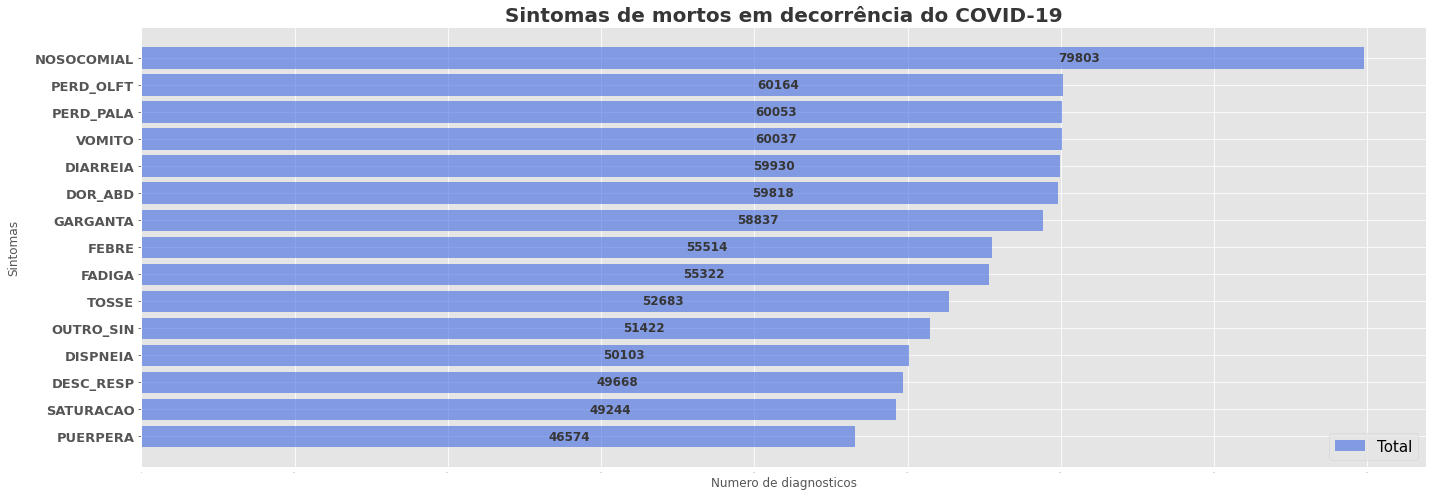

In [25]:
# Dados
data = df_sintomas_m.sum().sort_values()
display(data.to_frame('Total'))

X = data.values
Y = np.arange(len(X))

x_labels = data.values
y_labels = data.keys()

# Grafico
plt.subplots(figsize = (20, 7))
plt.barh(Y,X, alpha = .6, color = "royalblue",label='Total')


for x,y,s in zip(X,Y,x_labels):
    plt.text(x-len(str(round(s)))*4000,y-0.12,round(s),fontsize=12,fontweight='bold',color='#363636')


plt.yticks(Y,y_labels,fontweight='bold',fontsize=13)
plt.title("Sintomas de mortos em decorrência do COVID-19",fontsize=20,fontweight='bold',color='#363636')
plt.xlabel("Numero de diagnosticos")
plt.ylabel("Sintomas",labelpad=15)
plt.tick_params(axis='x',labelsize=0,length=0)
plt.legend(loc='lower right',fontsize=15)

plt.tight_layout()